In [35]:
import mnist
from sklearn.preprocessing import StandardScaler
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from scipy.cluster.hierarchy import fcluster
import pandas as pd
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation


In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

scaler              = StandardScaler()

scaled_train_images = scaler.fit_transform(train_images.reshape\
                                     ((train_images.shape[0], train_images.shape[1] * train_images.shape[2])))
scaled_test_images  = scaler.fit_transform(test_images.reshape\
                                     ((test_images.shape[0], test_images.shape[1] * test_images.shape[2])))




/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
X

array([[  9.21188,  -0.15189],
       [  8.88937,  -0.33937],
       [ 10.7684 ,   2.95245],
       [  8.24213,   1.29095],
       [  5.7967 ,  -5.83777],
       [  6.34993,   0.6396 ],
       [  8.10571,  -0.45887],
       [  8.72085,  -4.40444],
       [  8.83501,  -0.39166],
       [ 10.40061,   2.71241],
       [ 11.95503,   1.98603],
       [  8.50142,   0.5035 ],
       [  9.23359,   1.30693],
       [ 12.27768,   1.62764],
       [ 10.95902,  -0.12752],
       [  8.72437,  -0.73102],
       [  9.64949,   3.41989],
       [ 11.49912,  -0.55113],
       [ 11.48256,  -0.28623],
       [  8.5874 ,   1.66814],
       [ 11.9557 ,  -1.27351],
       [  9.85622,   1.08989],
       [ 10.11831,   1.08458],
       [  7.76042,   0.63747],
       [ 10.99794,  -2.93747],
       [  6.9085 ,  -1.44868],
       [  7.85787,  -0.99148],
       [  6.12508,  -2.44306],
       [ 10.61144,  -0.23623],
       [ 11.09217,  -1.69984],
       [  7.15907,  -0.12267],
       [ 10.73784,  -1.63561],
       [

In [13]:
Z = linkage(scaled_test_images, 'ward')

In [14]:
Z

array([[  1392.     ,   4871.     ,      2.7859 ,      2.     ],
       [  3641.     ,   9335.     ,      2.84857,      2.     ],
       [  1213.     ,   3930.     ,      2.85448,      2.     ],
       ..., 
       [ 19984.     ,  19995.     ,    512.89738,   6261.     ],
       [ 19976.     ,  19996.     ,    588.42721,   6808.     ],
       [ 19994.     ,  19997.     ,    608.34945,  10000.     ]])

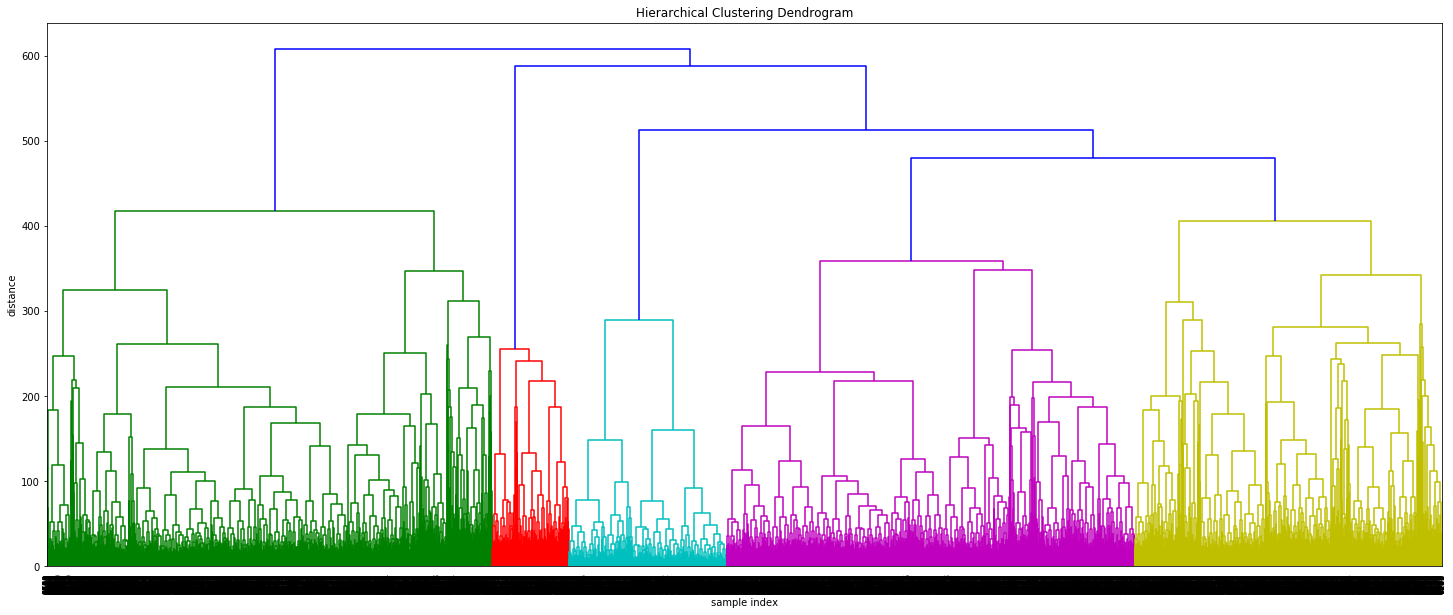

In [15]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


In [19]:
Z[-10:, 2]

array([ 342.11107,  347.52296,  347.86967,  358.28507,  406.29738,
        417.02099,  480.07948,  512.89738,  588.42721,  608.34945])

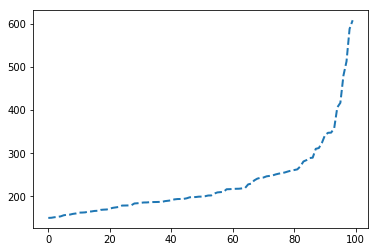

In [26]:
fig, ax = plt.subplots()

line1, = ax.plot(range(100), Z[-100:, 2], '--', linewidth=2,
                 label='Dashes set retroactively')


plt.show()


As we can see, the distances between clusters seem to increase exponentially after the 80th iteration, indicating that everything below that might be too close to each other to form seperate clusters. Therefore we will truncate the dendogram top show only the last 20 clusters.

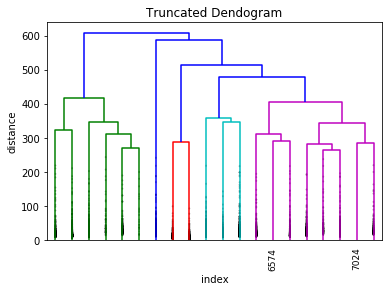

In [29]:
plt.title('Truncated Dendogram')
plt.xlabel('index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=20,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=9.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [32]:
max_d = 50
clusters = fcluster(Z, max_d, criterion='distance')


array([  7, 518, 259, ...,  69, 344, 434], dtype=int32)

In [33]:
len(clusters)

10000

In [36]:

purity_df = pd.DataFrame([clusters, test_labels]).transpose()
purity_df.columns = ['yhat_test', 'y_test']
purity_numerator = 0
purity_denominator = len(purity_df)

for cluster in purity_df['yhat_test'].unique():
    
    purity_numerator += int(purity_df[purity_df['yhat_test'] == cluster].groupby('y_test')\
                                .count()\
                                .sort_values('yhat_test', ascending=False)\
                                .iloc[0])
purity_numerator/purity_denominator

0.8813

In [45]:
#gini_coeffs = np.zeros([len(purity_df['y_test'].unique()), 2])
gini_coeffs = np.zeros([len(set(clusters)), 2])
i = 0
k = len(set(clusters))

for cluster in clusters:

    if (i < k):
        
        gini_coeffs[i][0] = sum(((purity_df[purity_df['yhat_test'] == cluster].groupby('y_test')\
                                    .count()\
                                    .sort_values('yhat_test', ascending=False)\
                            /len(purity_df[purity_df['yhat_test'] == cluster]))\
                            **2)\
                            ['yhat_test'])

        gini_coeffs[i][1] = len(purity_df[purity_df['yhat_test'] == cluster])

        i += 1
    
    else: break

sum(gini_coeffs[:,0] * gini_coeffs[:,1]) / sum(gini_coeffs[:,1])

0.84165940516120452

In [39]:
len(set(clusters))

596

In [43]:
len(purity_df['y_test'].unique())

10